In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import operator as op
import warnings
from scipy import spatial
from sklearn import model_selection as ms

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('C:\\Users\\Onur\\Desktop\\ml-100k\\u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movieId', 'rating', 'timestamp']
ratings = pd.read_csv('C:\\Users\\Onur\\Desktop\\ml-100k\\u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
m_cols = ['movieId', 'title', 'release_date', 'video_release_date', 'imdb_url',
          'unknown','Action','Adventure','Animation','Children','Comedy','Crime',
          'Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery',
          'Romance','SciFi','Thriller','War','Western']
movie_df = pd.read_csv('C:\\Users\\Onur\\Desktop\\ml-100k\\u.item', sep='|', names=m_cols,
                     encoding='latin-1')
movie_df.head(2)

,movieId,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df = movie_df[['unknown','Action','Adventure','Animation','Children',
                               'Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir',
                               'Horror','Musical','Mystery','Romance','SciFi','Thriller',
                               'War','Western']].applymap(lambda x: np.nan if x == 0 else x)
movie_df['genres'] = df.replace(1, pd.Series(df.columns, df.columns))\
                       .apply(lambda x: '|'.join(x.dropna()), axis=1)
movie_df.head(2)

,movieId,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,genres
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Animation|Children|Comedy
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,Action|Adventure|Thriller


In [4]:
movies = movie_df[['movieId', 'title','genres']]

In [5]:
movies.head((2))

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children|Comedy
1,2,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
ratings.head(2)

,user_id,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [7]:
movie_ratings_df = pd.merge(movie_df, ratings);
movie_ratings_df.head()

,movieId,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Mystery,Romance,SciFi,Thriller,War,Western,genres,user_id,rating,timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,Animation|Children|Comedy,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,Animation|Children|Comedy,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,Animation|Children|Comedy,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,Animation|Children|Comedy,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,Animation|Children|Comedy,66,3,883601324


In [8]:
moviesInfo = pd.DataFrame(movie_ratings_df.groupby('movieId')['rating'].mean())
moviesInfo['numRatings'] = movie_ratings_df.groupby('movieId')['rating'].count()
movieNormalizedNumRatings = pd.DataFrame(moviesInfo['rating'])
moviesInfo['ratingNormalized'] = movieNormalizedNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
moviesInfo.head()

,rating,numRatings,ratingNormalized
movieId,,,
1,3.878319,452,0.719580
2,3.206107,131,0.551527
3,3.033333,90,0.508333
4,3.550239,209,0.637560
5,3.302326,86,0.575581


In [9]:
ratings['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Text(0, 0.5, 'Frequency')

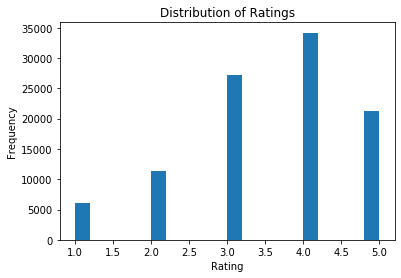

In [10]:
ratings.rating.plot.hist(bins=20)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

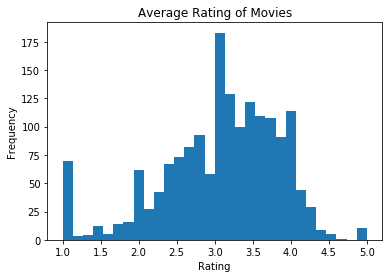

In [11]:
moviesInfo.rating.plot.hist(bins=30)
plt.title("Average Rating of Movies")
plt.xlabel("Rating")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

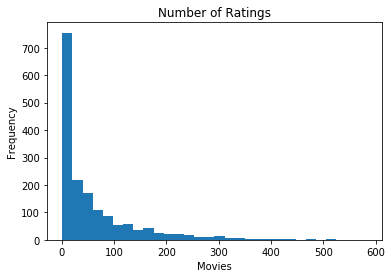

In [12]:
moviesInfo.numRatings.plot.hist(bins=30)
plt.title("Number of Ratings")
plt.xlabel("Movies")
plt.ylabel("Frequency")

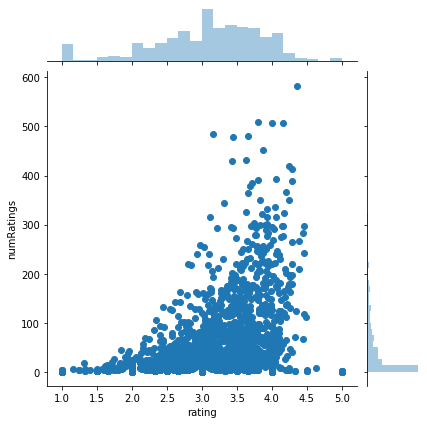

In [13]:
sb.jointplot(x='rating', y='numRatings', data=moviesInfo)

In [14]:
moviesInfoMinTreshold = moviesInfo.drop(moviesInfo[moviesInfo['numRatings'] < 100].index)
moviesInfoMinTreshold.head()

,rating,numRatings,ratingNormalized
movieId,,,
1,3.878319,452,0.719580
2,3.206107,131,0.551527
4,3.550239,209,0.637560
7,3.798469,392,0.699617
8,3.995434,219,0.748858


In [15]:
genres = [
    "Action",
    "Adventure",
    "Animation",
    "Children's",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western"
]

def getGenresList(movieGenres, totalGenresNum):
    genresList = np.zeros(len(genres), dtype=int)
    
    if not isinstance(movieGenres, list):
        return genresList
    
    for genre in movieGenres:
        if genre in genres:
            genresList[genres.index(genre)] = 1
    return genresList

movie_df.set_index(keys='movieId', inplace=True)
movieGenres = pd.DataFrame(movie_df['genres'].str.split("|"))

movieGenresDict = {}
totalGenresNum = len(genres)

for i in range(len(movieGenres)):
    if (i + 1 in movieGenres.index):
        movieGenresDict[i + 1] = getGenresList(movieGenres.get_value(i + 1, 'genres'), totalGenresNum)
        
def getMovieDistance(idMovie1, idMovie2):
    genresListMovie1 = movieGenresDict[idMovie1]
    genresListMovie2 = movieGenresDict[idMovie2]
    genreDistance = spatial.distance.cosine(genresListMovie1, genresListMovie2)
    ratingMovie1 = moviesInfoMinTreshold.get_value(idMovie1, 'ratingNormalized')
    ratingMovie2 = moviesInfoMinTreshold.get_value(idMovie2, 'ratingNormalized')
    ratingDistance = abs(ratingMovie1 - ratingMovie2)
    return (genreDistance + ratingDistance)

def getKNearestNeighbours(movieIdFocal, K):
    distances = []
    for movieId in movieGenresDict.keys():
        if (movieId != movieIdFocal and movieId in moviesInfoMinTreshold.index):
            dist = getMovieDistance(movieIdFocal, movieId)
            distances.append((movieId, dist))
    distances.sort(key=op.itemgetter(1))
    neighbours = []
    for x in range(K):
        neighbours.append(distances[x][0])
    return neighbours

def printKNearestNeighbours(movieIDFocal, K):
    neighbours = getKNearestNeighbours(movieIDFocal, K)
    neighbourInfo = []
    for neighbour in neighbours:
        neighbourInfo.append({'MovieId': neighbour,
                  'Title': movie_df.get_value(neighbour, 'title'),
                  'Average Rating': str(moviesInfoMinTreshold.get_value(neighbour, 'rating')),
                  'Genres': movie_df.get_value(neighbour, 'genres')})
        
    return pd.DataFrame(neighbourInfo).set_index(keys='MovieId')

In [17]:
screamNeighbours = printKNearestNeighbours(2, 10)
screamNeighbours

,Title,Average Rating,Genres
MovieId,,,
118,Twister (1996),3.2150170648464163,Action|Adventure|Thriller
252,"Lost World: Jurassic Park, The (1997)",2.9430379746835444,Action|Adventure|SciFi|Thriller
164,"Abyss, The (1989)",3.589403973509934,Action|Adventure|SciFi|Thriller
117,"Rock, The (1996)",3.693121693121693,Action|Adventure|Thriller
148,"Ghost and the Darkness, The (1996)",3.203125,Action|Adventure
62,Stargate (1994),3.141732283464567,Action|Adventure|SciFi
227,Star Trek VI: The Undiscovered Country (1991),3.279503105590062,Action|Adventure|SciFi
229,Star Trek III: The Search for Spock (1984),3.111111111111111,Action|Adventure|SciFi
226,Die Hard 2 (1990),3.355421686746988,Action|Thriller


In [18]:
starWarsNeighbours = printKNearestNeighbours(2, 7)
starWarsNeighbours

,Title,Average Rating,Genres
MovieId,,,
118,Twister (1996),3.2150170648464163,Action|Adventure|Thriller
252,"Lost World: Jurassic Park, The (1997)",2.9430379746835444,Action|Adventure|SciFi|Thriller
164,"Abyss, The (1989)",3.589403973509934,Action|Adventure|SciFi|Thriller
117,"Rock, The (1996)",3.693121693121693,Action|Adventure|Thriller
148,"Ghost and the Darkness, The (1996)",3.203125,Action|Adventure
62,Stargate (1994),3.141732283464567,Action|Adventure|SciFi
227,Star Trek VI: The Undiscovered Country (1991),3.279503105590062,Action|Adventure|SciFi


In [19]:
userRatings_matrix = movie_ratings_df.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [20]:
corrMatrix = userRatings_matrix.corr(method='pearson', min_periods=100)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# view the ratings given by a random user
ratingsUserX = userRatings_matrix.loc[32].dropna().sort_values(ascending=False)
ratingsUserX

title
Face/Off (1997)                                       5.0
Trainspotting (1996)                                  5.0
Chasing Amy (1997)                                    4.5
Leaving Las Vegas (1995)                              4.0
Fifth Element, The (1997)                             4.0
Men in Black (1997)                                   4.0
Mission: Impossible (1996)                            4.0
People vs. Larry Flynt, The (1996)                    4.0
Private Parts (1997)                                  4.0
Return of the Jedi (1983)                             4.0
Austin Powers: International Man of Mystery (1997)    4.0
Scream (1996)                                         4.0
Sleepers (1996)                                       4.0
Star Wars (1977)                                      4.0
Titanic (1997)                                        4.0
Twelve Monkeys (1995)                                 4.0
Grosse Pointe Blank (1997)                            4.0
Fargo (1